# Functions

## What are functions?

Functions are reusable blocks of code that perform a specific task. They help streamline your code by allowing you to avoid repetition, improve readability, and make maintenance easier.

The general syntax for defining a function is the following:

```python
def function_name(parameter_1, ..., parameter_n):
    """Docstring"""
    <body of the function>
    return value  # Depending on the function
```

In [1]:
# Example 1: one-line docstring, no parameters, no return value
def greet():
    """Print a greeting message."""
    print("Hello, welcome to the class!")

In [2]:
# Example 2: multi-line docstring, parameters, and return value
def calculate_area(radius):
    """
    Calculate the area of a circle given its radius.
    
    Args:
        radius (float): The radius of the circle.
        
    Returns:
        float: The area of the circle, calculated as π * radius^2.
    """
    area = 3.14159 * radius ** 2
    return area

In [6]:
for radius in [1,2,3]:
    area = calculate_area(radius)
    print(f"The area of a circle with radius {radius} is {area:.2f}")

The area of a circle with radius 1 is 3.14
The area of a circle with radius 2 is 12.57
The area of a circle with radius 3 is 28.27


## Data loading and preparation

We'll practice creating functions using the same datasets from last week.

In [4]:
import os
import pandas as pd

import geopandas as gpd
import matplotlib.pyplot as plt

# Display all columns when looking at dataframes
pd.set_option("display.max.columns", None)

# --------------------------------------------------
# Import power plants data
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/refs/heads/main/data/power_plants_epsg4269.csv'
power_plants = pd.read_csv(URL)
power_plants = power_plants.drop(columns='Unnamed: 0') # Drop first column

# Import states data
fp = os.path.join('data','tl_2022_us_state','tl_2022_us_state.shp')
states = gpd.read_file(fp)
states.columns = states.columns.str.lower()

# --------------------------------------------------
# Create geometry column for power plants
points = gpd.points_from_xy(power_plants.longitude,
                            power_plants.latitude)

# Convert power plants DataFrame to GeoDataFrame
power_plants = gpd.GeoDataFrame(power_plants,      # Data
                                geometry=points,   # Specify geometry column
                                crs='EPSG:4269'    # Specify CRS
                                )


## Exercise: CA top power plant sources map

Last week we solved the followinge exercise to use a `for` with a `zip` to create subplots of the top 3 power plant sources in California.

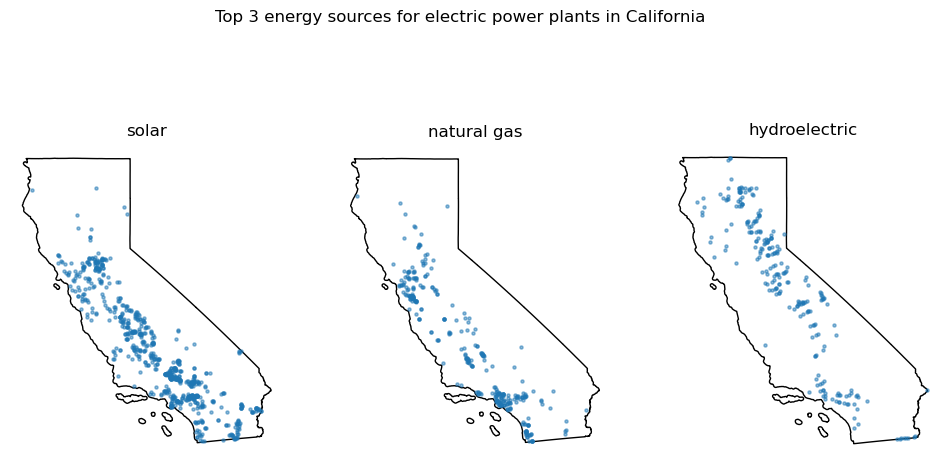

In [5]:
# Select CA power plants and boundary
ca_power_plants = power_plants[power_plants['state'] == 'California']
ca_boundary = states[states['name'] == 'California']

# CA top 3 power sources were previously given
ca_top_sources = ['solar', 'natural gas', 'hydroelectric']

# Create subplots for each top source in a single figure
fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=3)
for axis, source in zip(ax, ca_top_sources):   # Iterate over subplots and energy sources

    axis.set_title(source)
    axis.axis('off')

    ca_boundary.plot(ax=axis,
                     color='none')
    
    # Subset power plants by source and plot
    source_subset = ca_power_plants[ca_power_plants['primsource'] == source]
    source_subset.plot(ax=axis,
                    markersize=5,
                    alpha=0.5)

plt.suptitle(f"Top 3 energy sources for electric power plants in California")    
plt.show()

# Recommended steps to create a function

1. solve the problem for a specific example
2. identify which parts of the code need to be feneralized and update these parts
3. wrap this into a function
4. add additional parameters or assert statemetns
5. test function
6. add a docstring

Ex: we want to obtain the top 3 power sources for any state programmatically as a function
## Step 1: solve for a specific example

ex: extract top 3 power sources for CA

In [12]:
# Subsetting to only power plants in Cali
state_power_plants = power_plants[power_plants['state'] == 'California']

top_sources = (state_power_plants['primsource']
               .value_counts()
               .index[:3]
               .tolist())
top_sources


['solar', 'natural gas', 'hydroelectric']

## Step 2: id parts of the code that neef to be generalized

In [13]:
state = "California"
state_power_plants = power_plants[power_plants['state'] == state]

top_sources = (state_power_plants['primsource']
               .value_counts()
               .index[:3]
               .tolist())
top_sources


['solar', 'natural gas', 'hydroelectric']

## Step 3: define the function
and 
## Step 4: adjust parameter

In [16]:
def top3_sources(state, power_plants):
    state_power_plants = power_plants[power_plants['state'] == state]
    top_sources = (state_power_plants['primsource']
                .value_counts()
                .index[:3]
                .tolist())
    return top_sources

In [18]:
top3_sources('Oregon', power_plants)

['solar', 'hydroelectric', 'wind']

## Example 
create a function to vectorize for any state

In [52]:
def plot_top3_power_sources(state, power_plants, states):
    # Select state power plants and boundary
    state_power_plants = power_plants[power_plants['state'] == state]
    state_boundary = states[states['name'] == state]

    # State top 3 power sources were previously given
    state_top_sources = top3_sources(state, power_plants)

    # Create subplots for each top source in a single figure
    fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=3)
    for axis, source in zip(ax, state_top_sources):   # Iterate over subplots and energy sources

        axis.set_title(source)
        axis.axis('off')

        state_boundary.plot(ax=axis,
                        color='none')
        
        # Subset power plants by source and plot
        source_subset = state_power_plants[state_power_plants['primsource'] == source]
        source_subset.plot(ax=axis,
                        markersize=5,
                        alpha=0.5)

    plt.suptitle(f"Top 3 energy sources for electric power plants in {state}")    
    plt.show()

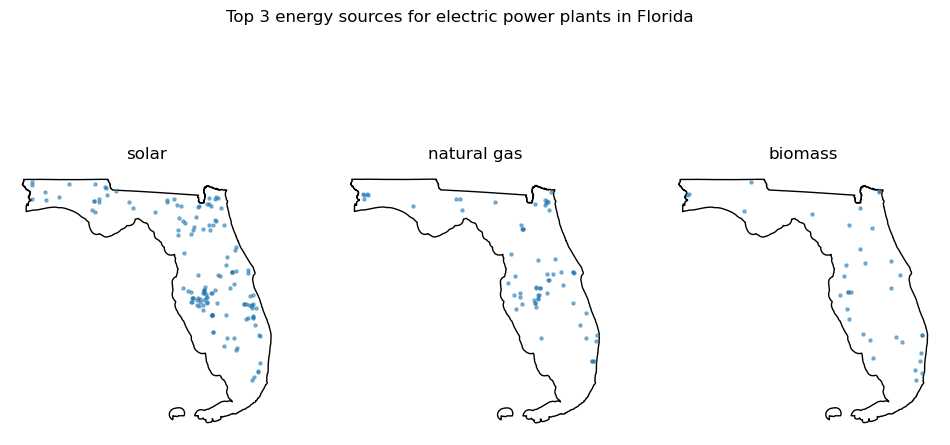

In [54]:
plot_top3_power_sources("Florida", power_plants, states)


In [46]:
def power_counts(source, power_plants):
    counts = power_plants[power_plants['primsource'] == source].value_counts("state")
    return counts

In [47]:
power_counts("solar", power_plants)

state
California              766
North Carolina          728
Massachusetts           467
Minnesota               462
New York                396
New Jersey              279
Florida                 137
Illinois                133
Colorado                129
Texas                   126
Maryland                125
Georgia                 124
Oregon                  113
South Carolina          106
Indiana                  91
Arizona                  88
New Mexico               76
Virginia                 71
Connecticut              59
Rhode Island             55
Vermont                  49
Nevada                   47
Michigan                 46
Wisconsin                43
Pennsylvania             42
Utah                     41
Maine                    37
Ohio                     35
Hawaii                   28
Tennessee                25
Missouri                 24
Arkansas                 21
Puerto Rico              16
Iowa                     15
Delaware                 13
Nebraska      

In [51]:
source = "wind"
top3_states = power_counts(source, power_plants).index[:3].tolist()
state_boundary = states[states['name'] == top3_states]
# Create subplots for each top source in a single figure
fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=3)
for axis, source in zip(ax, top3_states):   # Iterate over subplots and energy sources

    axis.set_title(source)
    axis.axis('off')

    state_boundary.plot(ax=axis,
                    color='none')


plt.suptitle(f"Top 3 energy sources for electric power plants in {state}")    
plt.show()

ValueError: ('Lengths must match to compare', (56,), (3,))